In [2]:
import pandas as pd
import numpy as np

In [4]:
transaction_df = pd.read_csv('Transactions.csv')
customer_df = pd.read_csv('Customers.csv')


In [5]:
transaction_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [6]:
customer_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [16]:
merged_data = transaction_df.merge(customer_df, on='CustomerID', how='left')


In [17]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


In [18]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.3+ KB


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
merged_data[['Quantity', 'TotalValue', 'Price']] = scaler.fit_transform(merged_data[['Quantity', 'TotalValue', 'Price']])

This is done to scale the numerical values appropriately, as the ranges were quite different

In [20]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,0.000000,0.144104,0.590849,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,0.000000,0.144104,0.590849,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,0.000000,0.144104,0.590849,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,0.333333,0.296350,0.590849,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,0.666667,0.448596,0.590849,Timothy Perez,Europe,2022-03-15


This will convert categorical data into one hot encodings in order to capture the relationship of the regions as well

In [21]:
merged_data = pd.get_dummies(merged_data, columns=['Region'], dtype=int)

In [22]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,SignupDate,Region_Asia,Region_Europe,Region_North America,Region_South America
0,T00001,C0199,P067,2024-08-25 12:38:23,0.000000,0.144104,0.590849,Andrea Jenkins,2022-12-03,0,1,0,0
1,T00112,C0146,P067,2024-05-27 22:23:54,0.000000,0.144104,0.590849,Brittany Harvey,2024-09-04,1,0,0,0
2,T00166,C0127,P067,2024-04-25 07:38:55,0.000000,0.144104,0.590849,Kathryn Stevens,2024-04-04,0,1,0,0
3,T00272,C0087,P067,2024-03-26 22:55:37,0.333333,0.296350,0.590849,Travis Campbell,2024-04-11,0,0,0,1
4,T00363,C0070,P067,2024-03-21 15:10:10,0.666667,0.448596,0.590849,Timothy Perez,2022-03-15,0,1,0,0


In [26]:
merged_data = merged_data.drop('CustomerName', axis=1)

We have removed all textual data as the model will only work with numerical data

In [27]:
merged_data

,Quantity,TotalValue,Price,Region_Asia,Region_Europe,Region_North America,Region_South America
0,0.000000,0.144104,0.590849,0,1,0,0
1,0.000000,0.144104,0.590849,1,0,0,0
2,0.000000,0.144104,0.590849,0,1,0,0
3,0.333333,0.296350,0.590849,0,0,0,1
4,0.666667,0.448596,0.590849,0,1,0,0
...,...,...,...,...,...,...,...
995,0.000000,0.224703,0.921317,0,0,0,1
996,0.666667,0.690394,0.921317,0,0,1,0
997,1.000000,0.923239,0.921317,0,0,1,0
998,0.333333,0.457549,0.921317,1,0,0,0


In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
merged_data['cluster'] = kmeans.fit_predict(merged_data)

c:\Users\tanav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [50]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(merged_data.drop('cluster', axis=1), merged_data['cluster'])

print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.7217190677360916


As there are many features in the dataset used for clustering I will use PCA (Principal Component Analysis) to reduce the dimensionality


In [51]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [52]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(merged_data.drop('cluster', axis=1))
merged_data['pca1'], merged_data['pca2'] = reduced_data[:, 0], reduced_data[:, 1]


In [53]:
merged_data.head()

,Quantity,TotalValue,Price,Region_Asia,Region_Europe,Region_North America,Region_South America,cluster,pca1,pca2
0,0.000000,0.144104,0.590849,0,1,0,0,2,-0.378273,-0.589917
1,0.000000,0.144104,0.590849,1,0,0,0,0,-0.298434,-0.123432
2,0.000000,0.144104,0.590849,0,1,0,0,2,-0.378273,-0.589917
3,0.333333,0.296350,0.590849,0,0,0,1,1,0.779812,0.106309
4,0.666667,0.448596,0.590849,0,1,0,0,2,-0.310421,-0.691753


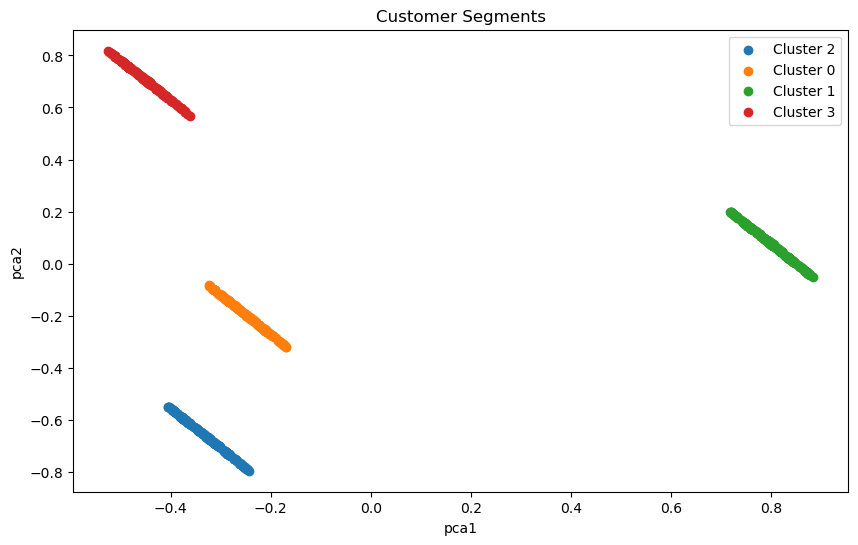

In [54]:
plt.figure(figsize=(10, 6))
for cluster in merged_data['cluster'].unique():
    cluster_data = merged_data[merged_data['cluster'] == cluster]
    plt.scatter(cluster_data['pca1'], cluster_data['pca2'], label=f'Cluster {cluster}')

plt.legend()
plt.title('Customer Segments')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.show()

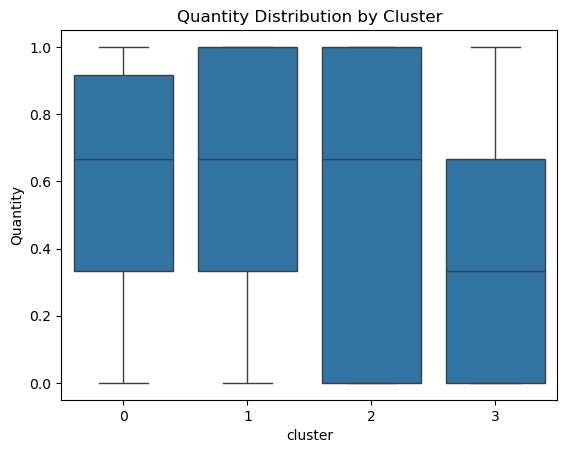

In [60]:
import seaborn as sns
sns.boxplot(x='cluster', y='Quantity', data = merged_data)
plt.title('Quantity Distribution by Cluster')
plt.show()